In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support,roc_curve
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# from google.colab import files
# uploaded = files.upload()

In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/diabetes_binary_health_indicators_BRFSS2015.csv")

In [5]:
df.shape

(253680, 22)

In [6]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Check missing values

In [7]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
dup = df[df.duplicated()]
print(f"Number of duplicate rows : {len(dup)}")

Number of duplicate rows : 24206


In [39]:
df.drop_duplicates(inplace = True)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [10]:
dup = df[df.duplicated()]
print(f"Number of duplicate rows : {len(dup)}")

Number of duplicate rows : 0


In [11]:
df.shape

(229474, 22)

Show the distribution of each features

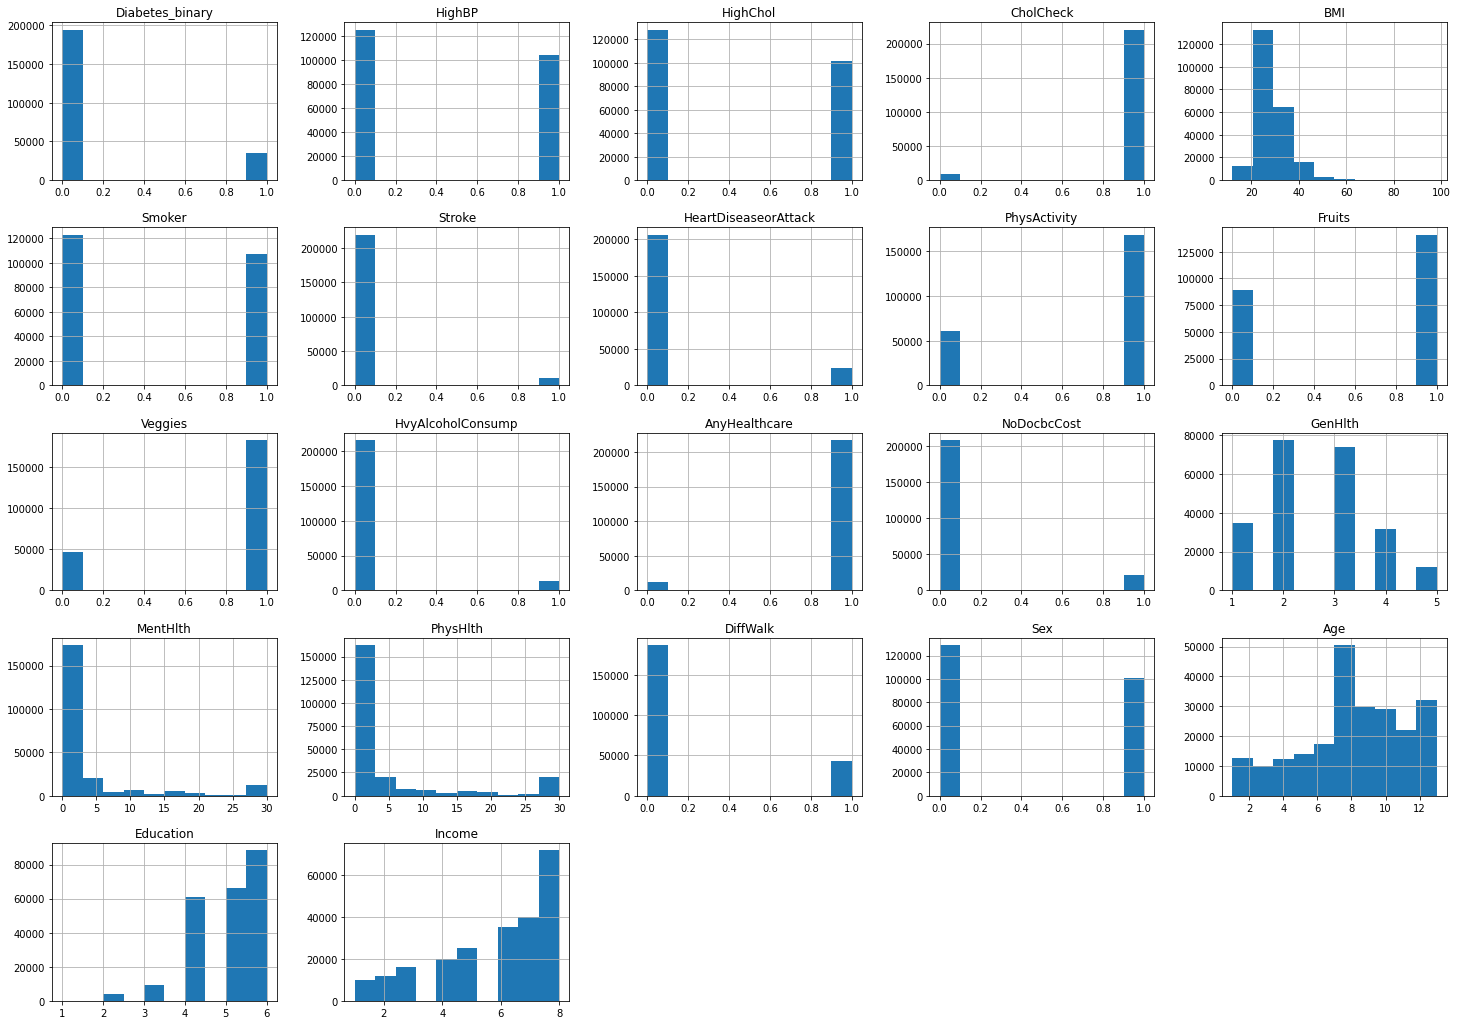

In [12]:
df.hist(figsize=(25,18));

Check the correlation between features

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


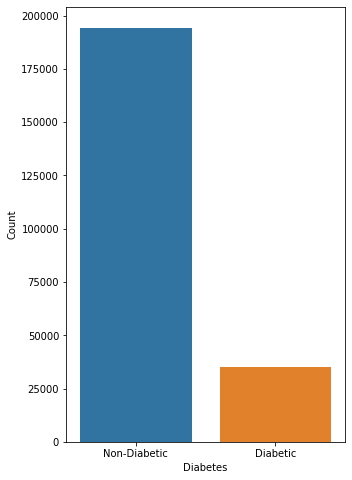

In [13]:
X=df.drop('Diabetes_binary', axis=1)
y=df['Diabetes_binary']
plt.figure(figsize=(5,8))
sns.countplot(df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"}))
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

In [42]:
columns_names = list(X.columns)
print(columns_names)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


In [14]:
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify=y)

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
smo = SMOTE(random_state = 42)
X_dev_smote,y_dev_smote = smo.fit_resample(X_dev,y_dev)

In [17]:
ss = StandardScaler()
X_dev_smote = ss.fit_transform(X_dev_smote)
X_test_smote = ss.transform(X_test)

In [18]:
y_dev_smote.shape

(311002,)

In [19]:
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_dev_smote, y_dev_smote,test_size=0.2)

In [20]:
print(f"The shape of x_train is {y_val_smote.shape}")

The shape of x_train is (62201,)


In [21]:
lr = LogisticRegression(penalty='l2')

lr.fit(X_train_smote, y_train_smote)
print(lr.score(X_test_smote, y_test))

clf_report = classification_report(y_test,lr.predict(X_test_smote))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test_smote)))

0.7155245669462904
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.75      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895

0.4473416864205892


In [22]:
lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')

lr.fit(X_train_smote, y_train_smote)
print(lr.score(X_test_smote, y_test))

clf_report = classification_report(y_test,lr.predict(X_test_smote))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test_smote)))

0.71554635581218
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.75      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895

0.44736062312153413


In [23]:
lr = LogisticRegression(C=1, penalty='elasticnet', solver='saga', l1_ratio = 0.2)

lr.fit(X_train_smote, y_train_smote)
print(lr.score(X_test_smote, y_test))

clf_report = classification_report(y_test,lr.predict(X_test_smote))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test_smote)))

0.7155245669462904
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.75      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895

0.4473416864205892


In [24]:
ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev,test_size=0.2)

In [25]:
lr = LogisticRegression(penalty='l2')

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

clf_report = classification_report(y_test,lr.predict(X_test))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test)))

0.8506155354613792
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38876
         1.0       0.54      0.15      0.24      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.58     45895
weighted avg       0.82      0.85      0.81     45895

0.2373748609566185


In [26]:
lr = LogisticRegression(C=1, penalty='l1', solver='liblinear')

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

clf_report = classification_report(y_test,lr.predict(X_test))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test)))

0.8505937465954897
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38876
         1.0       0.54      0.15      0.24      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.58     45895
weighted avg       0.82      0.85      0.81     45895

0.237178774057181


In [27]:
lr = LogisticRegression(C=1, penalty='elasticnet', solver='saga', l1_ratio = 0.2)

lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

clf_report = classification_report(y_test,lr.predict(X_test))
print(clf_report)

print(f1_score(y_test,lr.predict(X_test)))

0.8506155354613792
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38876
         1.0       0.54      0.15      0.24      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.58     45895
weighted avg       0.82      0.85      0.81     45895

0.2373748609566185


In [28]:
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr, distributions, random_state=0)
search = clf.fit(X_train, y_train)
print(search.best_params_)


print(clf.score(X_test, y_test))

clf_report = classification_report(y_test,clf.predict(X_test))
print(clf_report)

print(f1_score(y_test,clf.predict(X_test)))

{'C': 0.22685190926977272, 'penalty': 'l2'}
0.8505065911319316
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     38876
         1.0       0.54      0.15      0.24      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.58     45895
weighted avg       0.81      0.85      0.81     45895

0.23588372870030075


In [29]:
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])
clf = RandomizedSearchCV(lr, distributions, random_state=0)
search = clf.fit(X_train_smote, y_train_smote)
print(search.best_params_)


print(clf.score(X_test_smote, y_test))

clf_report = classification_report(y_test,clf.predict(X_test_smote))
print(clf_report)

print(f1_score(y_test,clf.predict(X_test_smote)))

{'C': 3.3770629943240693, 'penalty': 'l1'}
0.7159385553981915
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81     38876
         1.0       0.32      0.75      0.45      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.73      0.63     45895
weighted avg       0.85      0.72      0.75     45895

0.44774854915914775


In [62]:
from matplotlib import pyplot

lr = LogisticRegression(C=3.377, penalty='l1', solver='liblinear')

lr.fit(X_train_smote, y_train_smote)

importance = lr.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.40119
Feature: 1, Score: 0.33412
Feature: 2, Score: 0.24769
Feature: 3, Score: 0.48332
Feature: 4, Score: -0.00891
Feature: 5, Score: -0.00643
Feature: 6, Score: 0.04029
Feature: 7, Score: 0.02651
Feature: 8, Score: 0.00300
Feature: 9, Score: 0.03212
Feature: 10, Score: -0.22343
Feature: 11, Score: 0.05352
Feature: 12, Score: -0.04288
Feature: 13, Score: 0.65600
Feature: 14, Score: -0.04099
Feature: 15, Score: -0.08874
Feature: 16, Score: 0.02611
Feature: 17, Score: 0.14985
Feature: 18, Score: 0.39752
Feature: 19, Score: -0.01531
Feature: 20, Score: -0.10106


In [63]:
columns_names[0]

'HighBP'

In [68]:
# Reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
def f_importances(coef, names, s='without'):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(f'Logistic regression with SMOTE Feature Importance')
    plt.show()

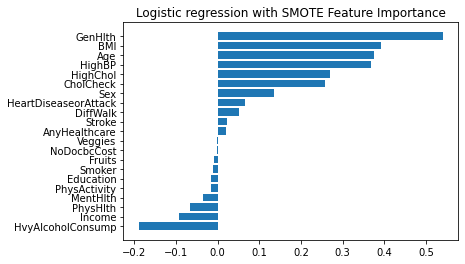

In [69]:
f_importances(importance, X.columns)

In [66]:
from matplotlib import pyplot

lr = LogisticRegression(C=0.226, penalty='l2', solver='liblinear')

lr.fit(X_train, y_train)

importance = lr.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.36737
Feature: 1, Score: 0.27053
Feature: 2, Score: 0.25750
Feature: 3, Score: 0.39201
Feature: 4, Score: -0.00980
Feature: 5, Score: 0.02357
Feature: 6, Score: 0.06500
Feature: 7, Score: -0.01555
Feature: 8, Score: -0.00894
Feature: 9, Score: -0.00128
Feature: 10, Score: -0.18900
Feature: 11, Score: 0.01927
Feature: 12, Score: -0.00212
Feature: 13, Score: 0.54029
Feature: 14, Score: -0.03462
Feature: 15, Score: -0.06661
Feature: 16, Score: 0.05078
Feature: 17, Score: 0.13614
Feature: 18, Score: 0.37557
Feature: 19, Score: -0.01550
Feature: 20, Score: -0.09171


In [70]:
# Reference: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
def f_importances(coef, names, s='without'):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title(f'Logistic regression without SMOTE Feature Importance')
    plt.show()

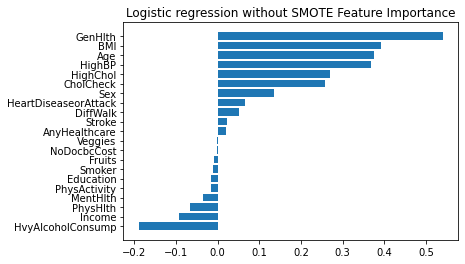

In [71]:
f_importances(importance, X.columns)